In [98]:
# Import libraries. You may or may not use all of these.
# !pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

In [176]:
# Import data
# !wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [100]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [193]:
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

# dataset.dtypes
dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


In [195]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')
train_dataset.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
521,32,44.2,0,False,False,False,True,False
408,38,21.1,3,True,False,False,True,False
1313,19,34.7,2,False,True,False,False,True
1184,23,28.5,1,False,True,False,True,False
305,29,33.3,2,True,False,True,False,False


In [196]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))
print(normalizer.mean.numpy())

[[39.04486    30.678318    1.0990654   0.49532712  0.20654206  0.23738317
   0.27663553  0.2364486 ]]


In [216]:
model = keras.Sequential([
    layers.Input(shape=(train_dataset.shape[1],)),
    normalizer,
    layers.Dense(64),
    layers.Dense(64),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.05), metrics=['mae', 'mse'])

# model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['mae', 'mse'])
model.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,866 (26.82 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 17 (72.00 B)

In [217]:

# model.compile(optimizer='adam',loss='mean_absolute_error', metrics=['mae', 'mse'])
# model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['mae', 'mse'])
epochs = 100
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_dataset,
    train_labels,
    epochs=epochs,
    verbose=True,
    callbacks=[early_stopping],
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 11928.7256 - mae: 11928.7256 - mse: 288976960.0000 - val_loss: 4861.3745 - val_mae: 4861.3745 - val_mse: 63892160.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3627.3723 - mae: 3627.3723 - mse: 40900724.0000 - val_loss: 2794.6458 - val_mae: 2794.6458 - val_mse: 28278782.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3240.1646 - mae: 3240.1646 - mse: 38411404.0000 - val_loss: 2464.9290 - val_mae: 2464.9290 - val_mse: 24474332.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2849.2754 - mae: 2849.2754 - mse: 30781550.0000 - val_loss: 3028.1865 - val_mae: 3028.1865 - val_mse: 35146800.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3050.2729 - mae: 3050.2729 - mse: 36537272.0000 - val_loss: 2646.0977 - val_mae: 2646.0977 - val_mse: 29206280.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2920.8362 - mae: 2920.8362 - mse: 32937370.0000 - val_loss: 27

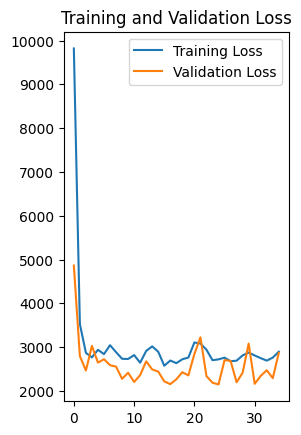

In [218]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

9/9 - 0s - 4ms/step - loss: 2532.2451 - mae: 2532.2451 - mse: 28552218.0000
Testing set Mean Abs Error: 2532.25 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


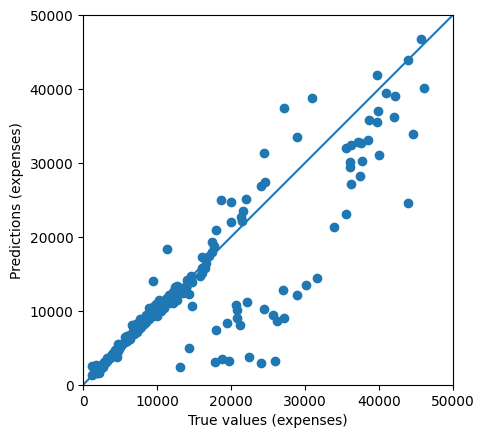

In [219]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
